# China's One Child Policy

At what point are there too many men?


In [55]:
%matplotlib inline

from modsim import *

In [56]:
"""" game plan:
write a system with :
t0 = time started
adult population0 
    male pop0
    female pop0
death_rate = death rate of population

juvenile_pop0
maturation # = when they reach a certain age, they are considered good to birth/have a baby 
    maturation# = maturation[i-18] (if 18 is the "mature" number)
probability of being a girl or boy = calculcated from the male/female ratio
    
TimeSeries = array

run_simulation(system)
make two dataFrames, one young and one old w/ subarrays w/ males and females (and possibly total to make code cleaner) 
    FIGURE OUT HOW TO WRITE/INTIALIZE DATAFRAMES
set pop0 to actual data points

FOR every year: 
    #ofmaturationsgirls = system.young[i - (ageWhenMature)] #pulling the number of babies that were born ageWhenMature years ago
    #ofmaturationsboys = "              "                          "
    
    #ofbabiesNextYear = #ofmaturationsgirls
    young.males[t+1] = #ofbabiesNextYear * system.probOfB
    young.females[t+1] = #ofbabiesNextYear - young.males[t+1]
    
    #ofdeaths = adultpop[yearNow] * system.death_rate
    
    adultpopfemale = #ofmaturationgirls + adultpopfemale[yearBefore] - #ofdeaths/2
    adultpopmale = #ofmaturationboys + adultpopmale[yearBefore] - #ofdeaths/2


SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-56-1b8acae58c62>, line 32)

In [128]:
system = System(t0 = 0, 
                t_end = 10,
                old_pop0 = 300,
                young_pop0 = 250,
                ageWhenMature = 18,
                youngMale0 = 200,
                youngFemale0 = 150,
                oldMale0 = 150,
                oldFemale0 = 150) #age at which young -> old and has a baby

systemDouble = System(death_rate = 0.5,
                      probOfBeingBoy = 0.67)
system

,value
t0,0
t_end,10
old_pop0,300
young_pop0,250
ageWhenMature,18
youngMale0,200
youngFemale0,150
oldMale0,150
oldFemale0,150


In [129]:
systemDouble

,value
death_rate,0.50
probOfBeingBoy,0.67


In [2]:
youngFemale = TimeSeries()
youngMale = TimeSeries()
youngTotal = TimeSeries()
oldMale = TimeSeries()
oldFemale = TimeSeries()
oldTotal = TimeSeries()
population = TimeSeries()

NameError: name 'TimeSeries' is not defined

In [149]:
beforePolicy=[200, 210, 215, 320, 310, 219, 247, 362, 274, 373, 249, 384, 258, 314, 246, 287, 293, 310]
beforePolicy

[200,
 210,
 215,
 320,
 310,
 219,
 247,
 362,
 274,
 373,
 249,
 384,
 258,
 314,
 246,
 287,
 293,
 310]

In [3]:
def run_simulation(system):
    people = [[],[],[],[],[],[],[]] #creating a list series
    youngMale = people[0]
    youngFemale = people[1]
    youngTotal = people[2]
    oldMale = people[3]
    oldFemale = people[4]
    oldTotal = people[5]
    population = people[6]

    youngMale = [None]*max(system.t_end+2)
    youngFemale = [None]*max(system.t_end+2)
    youngTotal = [None]*max(system.t_end+2)
    oldMale = [None]*max(system.t_end+2)
    oldFemale = [None]*max(system.t_end+2)
    oldTotal = [None]*max(system.t_end+2)
    population = [None]*max(system.t_end+2)

    oldTotal[system.t0] = system.old_pop0
    youngTotal[system.t0] = system.young_pop0
    youngMale[system.t0] = system.youngMale0
    youngFemale[system.t0] = system.youngFemale0
    oldMale[system.t0] = system.oldMale0
    oldFemale[system.t0] = system.oldFemale0
    population[system.t0] = system.old_pop0 + system.young_pop0
    
    
    for t in range(system.t0, system.t_end):
        i = 0
        
        if t < (system.t0 + system.ageWhenMature):
            maturationsGirls = beforePolicy[i]/2
            maturationsBoys = beforePolicy[i]/2
            
            babiesNextYear = maturationsGirls
            
            youngMale[t+1] = babiesNextYear*systemDouble.probOfBeingBoy + youngMale[t] - maturationsBoys
            youngFemale[t+1] = babiesNextYear - youngMale[t+1] + youngFemale[t] - maturationsGirls
            youngTotal[t+1] = youngMale[t+1] + youngFemale[t+1] + youngTotal[t]
            
            deaths = systemDouble.death_rate * oldTotal[t]
            
            oldFemale[t+1] = maturationsGirls + oldFemale[t] - deaths/2
            oldMale[t+1] = maturationsBoys + oldMale[t] - deaths/2
            oldTotal[t+1] = oldFemale[t+1] + oldMale[t+1]
            
            i+=1
            
            
        else:
            maturationsGirls = youngFemale[t- system.ageWhenMature]
            maturationsBoys = youngMale[t - system.ageWhenMature]
            
            babiesNextYear = maturationsGirls
            
            youngMale[t+1] = babiesNextYear*systemDouble.probOfBeingBoy + youngMale[t] - maturationsBoys
            youngFemale[t+1] = babiesNextYear - youngMale[t+1] + youngFemale[t] - maturationsGirls
            youngTotal[t+1] = youngMale[t+1] + youngFemale[t+1] + youngTotal[t]
            
            deaths = systemDouble.death_rate * oldTotal[t]
            
            oldFemale[t+1] = maturationsGirls + oldFemale[t] - deaths/2
            oldMale[t+1] = maturationsBoys + oldMale[t] - deaths/2
            oldTotal[t+1] = oldFemale[t+1] + oldMale[t+1]
            
            population = youngTotal[t+1] + oldTotal[t+1]
            
    system.population = population

Test your changes in `run_simulation`:

In [4]:
run_simulation(system)

NameError: name 'system' is not defined

Next, update `plot_results` to plot both the adult and juvenile `TimeSeries`.

In [190]:
def plot_results(system, title=None):
    """Plot the estimates and the model.
    
    system: System object with `results`
    """
    newfig()
    plot(system.population, 'bo-', label='population')
    decorate(xlabel='Time (years)', 
             ylabel='Population of China (in millions)',
             title=title)


And test your updated version of `plot_results`.

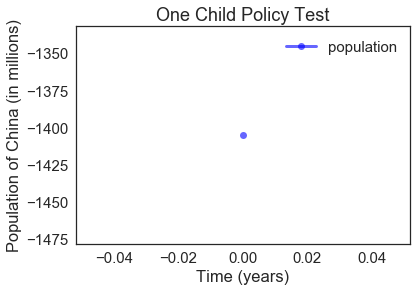

In [191]:
plot_results(system, title='One Child Policy Test')

In [195]:
help(plot)

Help on function plot in module modsim:

plot(*args, **kwargs)
    Makes line plots.
    
    args can be:
      plot(y)
      plot(y, style_string)
      plot(x, y)
      plot(x, y, style_string)
    
    kwargs are the same as for pyplot.plot
    
    If x or y have attributes label and/or units,
    label the axes accordingly.

